# Data preprocessing

## 1. Import and view data

In [1]:
import pandas as pd

#### Tweets

In [2]:
tweets_raw = pd.read_csv("../data/interim/Bundestag_Tweets.csv", index_col = "Unnamed: 0")

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
tweets_raw.head()

Datetime             Tweet Id  \
0  2021-12-24 09:06:37+00:00  1474305500472922113   
1  2021-12-17 13:41:57+00:00  1471838074413924356   
2  2021-12-15 12:34:54+00:00  1471096426381942791   
3  2021-12-15 11:58:36+00:00  1471087291913449472   
4  2021-12-15 11:58:35+00:00  1471087286301380616   

                                                Text    Username  \
0  Ich wünsche Ihnen ein frohes und gesegnetes We...  rbrinkhaus   
1  Herzlichen Glückwunsch @_FriedrichMerz. Alles ...  rbrinkhaus   
2  @dieLinke Die Rede in voller Länge gibt es in ...  rbrinkhaus   
3  Eine Demokratie braucht eine starke #Oppositio...  rbrinkhaus   
4  Eine gefährliche Mischung sehen wir in der #Mi...  rbrinkhaus   

      Twitter_Name  Reply_Count  Retweet_Count  Like_Count  
0  Ralph Brinkhaus         24.0            5.0        82.0  
1  Ralph Brinkhaus        133.0           22.0       611.0  
2  Ralph Brinkhaus          7.0            2.0        13.0  
3  Ralph Brinkhaus          8.0            1.0        33.0  
4  Ralph Brinkhaus          7.0            1.0        24.0

In [4]:
tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402229 entries, 0 to 339691
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Datetime       402227 non-null  object 
 1   Tweet Id       402227 non-null  object 
 2   Text           402227 non-null  object 
 3   Username       339692 non-null  object 
 4   Twitter_Name   339692 non-null  object 
 5   Reply_Count    339690 non-null  float64
 6   Retweet_Count  339690 non-null  float64
 7   Like_Count     339690 non-null  float64
dtypes: float64(3), object(5)
memory usage: 27.6+ MB


In [5]:
tweets_raw.dropna(inplace = True)

In [6]:
usernames_to_fullname = {'rbrinkhaus': 'Ralph Brinkhaus',
                         'groehe': 'Hermann Gröhe',
                         'NadineSchoen': 'Nadine Schön',
                         'n_roettgen': 'Norbert Röttgen',
                         'peteraltmaier': 'Peter Altmaier',
                         'jensspahn': 'Jens Spahn',
                         'MatthiasHauer': 'Matthias Hauer',
                         'c_lindner': 'Christian Lindner',
                         'MarcoBuschmann': 'Marco Buschmann',
                         'starkwatzinger': 'Bettina Stark-Watzinger',
                         'Lambsdorff': 'Alexander Graf Lambsdorff',
                         'johannesvogel': 'Johannes Vogel',
                         'KonstantinKuhle': 'Konstantin Kuhle',
                         'MAStrackZi': 'Marie-Agnes Strack-Zimmermann',
                         'larsklingbeil': 'Lars Klingbeil',
                         'EskenSaskia': 'Saskia Esken',
                         'hubertus_heil': 'Hubertus Heil',
                         'HeikoMaas': 'Heiko Maas',
                         'MartinSchulz': 'Martin Schulz',
                         'KarambaDiaby': 'Karamba Diaby',
                         'Karl_Lauterbach': 'Karl Lauterbach',
                         'SteffiLemke': 'Steffi Lemke',
                         'cem_oezdemir': 'Cem Özdemir',
                         'GoeringEckardt': 'Katrin Göring-Eckardt',
                         'KonstantinNotz': 'Konstantin von Notz',
                         '22': 'Konstantin von Notz',
                         'BriHasselmann': 'Britta Haßelmann',
                         'svenlehmann': 'Sven Lehmann',
                         'ABaerbock': 'Annalena Baerbock',
                         'SWagenknecht': 'Sahra Wagenknecht',
                         'b_riexinger': 'Bernd Riexinger',
                         'NiemaMovassat': 'Niema Movassat',
                         'jankortemdb': 'Jan Korte',
                         'DietmarBartsch': 'Dietmar Bartsch',
                         'GregorGysi': 'Gregor Gysi',
                         'SevimDagdelen': 'Sevim Dağdelen',
                         'Alice_Weidel': 'Alice Weidel',
                         'Beatrix_vStorch': 'Beatrix von Storch',
                         'JoanaCotar': 'Joana Cotar',
                         'StBrandner': 'Stephan Brandner',
                         'Tino_Chrupalla': 'Tino Chrupalla',
                         'GtzFrmming': 'Götz Frömming',
                         '5': 'Götz Frömming',
                         'Leif_Erik_Holm': 'Leif-Erik Holm'}

In [7]:
tweets_raw["full_name"] = tweets_raw.Username.replace(usernames_to_fullname)

In [8]:
tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339690 entries, 0 to 339691
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Datetime       339690 non-null  object 
 1   Tweet Id       339690 non-null  object 
 2   Text           339690 non-null  object 
 3   Username       339690 non-null  object 
 4   Twitter_Name   339690 non-null  object 
 5   Reply_Count    339690 non-null  float64
 6   Retweet_Count  339690 non-null  float64
 7   Like_Count     339690 non-null  float64
 8   full_name      339690 non-null  object 
dtypes: float64(3), object(6)
memory usage: 25.9+ MB


## 2. Prepocess data

#### Plenar protocolls

In [9]:
speeches_raw = pd.read_csv("../data/interim/bundestag_speeches_processed.csv")

In [10]:
speeches_raw.head()

id  session  electoral_term  first_name     last_name  politician_id  \
0  794153        2              18       Petra         Sitte       11003848   
1  794071        2              18  Marieluise          Beck       11002624   
2  794511        3              18        Karl  Schiewerling       11003839   
3  795916       11              18      Andrea        Nahles       11003196   
4  795917       11              18       Peter        Hintze       11000907   

                                      speech_content  fraction_id  \
0  Danke. - Ich möchte gerne etwas zu den Abstimm...            6   
1  \nHerr Präsident! Liebe Kolleginnen und Kolleg...            3   
2  Herr Präsident! Meine Damen und Herren! Liebe\...            4   
3                                          \nJa.\n\n           -1   
4                                         Bitte.\n\n           -1   

                                        document_url           position_short  \
0  https://dip21.bundestag.de/dip21/btp/18/18002.pdf     Member of Parliament   
1  https://dip21.bundestag.de/dip21/btp/18/18002.pdf     Member of Parliament   
2  https://dip21.bundestag.de/dip21/btp/18/18003.pdf     Member of Parliament   
3  https://dip21.bundestag.de/dip21/btp/18/18011.pdf                 Minister   
4  https://dip21.bundestag.de/dip21/btp/18/18011.pdf  Presidium of Parliament   

                              position_long        date  \
0                                       NaN  2013-11-18   
1                                       NaN  2013-11-18   
2                                       NaN  2013-11-28   
3  bundesministerin für arbeit und soziales  2014-01-30   
4                             vizepräsident  2014-01-30   

                               search_speech_content  
0  '0':16 '000':177 '1':87,176 '10':529 '11':554 ...  
1  '0':175 '1':212 '18':577 '2':325 '2009':185 '2...  
2  '0':28 '1':151 '10':435 '13':222 '1946':232 '2...  
3                                             'ja':1  
4                                           'bitt':1

In [11]:
speeches_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113618 entries, 0 to 113617
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     113618 non-null  int64 
 1   session                113618 non-null  int64 
 2   electoral_term         113618 non-null  int64 
 3   first_name             113609 non-null  object
 4   last_name              113615 non-null  object
 5   politician_id          113618 non-null  int64 
 6   speech_content         113565 non-null  object
 7   fraction_id            113618 non-null  int64 
 8   document_url           113618 non-null  object
 9   position_short         113618 non-null  object
 10  position_long          61370 non-null   object
 11  date                   113618 non-null  object
 12  search_speech_content  113498 non-null  object
dtypes: int64(5), object(8)
memory usage: 11.3+ MB


In [12]:
speeches_raw.dropna(subset = ["speech_content"], inplace = True)

In [13]:
speeches_raw["full_name"] = speeches_raw["first_name"] + " " + speeches_raw["last_name"]

In [14]:
len(speeches_raw["full_name"].unique())

1760

In [15]:
speeches_subset = speeches_raw[speeches_raw.full_name.isin(tweets_raw.full_name.unique())]

In [16]:
len(speeches_subset["full_name"].unique())

42

### Speeches

In [17]:
from tqdm.notebook import tqdm
tqdm.pandas()

import spacy
from spacy.language import Language
# python -m spacy download de_core_news_sm

In [18]:
# Create spacy pipeline
pipeline_exclude = ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'ner', 'morphologizer']
nlp_speeches = spacy.load('de_core_news_sm', exclude=pipeline_exclude)
nlp_speeches.Defaults.stop_words |= {"\n  ","\n\n  "}

@Language.component("Lemmatize text")
def lemmatize_text(doc):
    doc = [token.lemma_ for token in doc]
    doc = ' '.join(doc)
    return nlp_speeches.make_doc(doc)

@Language.component("Lowercase Text")
def lowercase(doc):
    doc = [token.lower_ for token in doc]
    doc = ' '.join(doc)
    return nlp_speeches.make_doc(doc)

@Language.component("Remove numbers that mark no year")
def remove_number_not_year(doc):
    return [token for token in doc if not token.is_digit or len(token.text) > 3]

@Language.component("Remove stopwords and punctuation")
def remove_stopwords(doc):
    doc = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return doc

# The add_pipe function appends our functions to the default pipeline.
nlp_speeches.add_pipe("Lemmatize text", name="Lemmatize text", last=True)
nlp_speeches.add_pipe("Lowercase Text", name="Lowercase Text", last=True)
nlp_speeches.add_pipe("Remove numbers that mark no year", name="Remove numbers that mark no year", last=True)
nlp_speeches.add_pipe("Remove stopwords and punctuation", name="Remove stopwords and punctuation", last=True)

<function __main__.remove_stopwords(doc)>

In [19]:
speeches_subset["text_preprocessed"] = speeches_subset.speech_content.progress_apply(nlp_speeches)

  0%|          | 0/4099 [00:00<?, ?it/s]

/var/folders/zx/r0fw_tq95g13lvmt5x8bp_vr0000gn/T/ipykernel_76360/1314431098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeches_subset["text_preprocessed"] = speeches_subset.speech_content.progress_apply(nlp_speeches)


In [20]:
speeches_subset["text_preprocessed_sentence"] = speeches_subset["text_preprocessed"].progress_apply(lambda x: " ".join(x))

  0%|          | 0/4099 [00:00<?, ?it/s]

/var/folders/zx/r0fw_tq95g13lvmt5x8bp_vr0000gn/T/ipykernel_76360/2148796881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeches_subset["text_preprocessed_sentence"] = speeches_subset["text_preprocessed"].progress_apply(lambda x: " ".join(x))


###  Twitter data

In [21]:
# Create emoji matcher
import re
emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

In [22]:
# Create spacy pipeline
pipeline_exclude = ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'ner', 'morphologizer']
nlp_twitter = spacy.load('de_core_news_sm', exclude=pipeline_exclude)
nlp_twitter.Defaults.stop_words |= {"\n    ", "amp", "rt"}

@Language.component("Lemmatize text")
def lemmatize_text(doc):
    doc = [token.lemma_ for token in doc]
    doc = ' '.join(doc)
    return nlp_twitter.make_doc(doc)

@Language.component("Lowercase Text")
def lowercase(doc):
    doc = [token.lower_ for token in doc]
    doc = ' '.join(doc)
    return nlp_twitter.make_doc(doc)

@Language.component("Remove URLs")
def remove_urls(doc):
    doc = [token.text for token in doc if not token.like_url]
    doc = ' '.join(doc)
    return nlp_twitter.make_doc(doc)

@Language.component("Remove emojis")
def remove_emojis(doc):
    doc = [token.text for token in doc if not re.match(emoji, token.text)]
    doc = ' '.join(doc)
    return nlp_twitter.make_doc(doc)

@Language.component("Remove mentions")
def remove_mentions(doc):
    doc = [token.text for token in doc if not re.match("@.*", token.text)]
    doc = ' '.join(doc)
    return nlp_twitter.make_doc(doc)

@Language.component("Remove stopwords and punctuation")
def remove_stopwords(doc):
    doc = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return doc

# The add_pipe function appends our functions to the default pipeline.
nlp_twitter.add_pipe("Lemmatize text", name="Lemmatize text", last=True)
nlp_twitter.add_pipe("Lowercase Text", name="Lowercase Text", last=True)
nlp_twitter.add_pipe("Remove URLs", name="Remove URLs", last=True)
nlp_twitter.add_pipe("Remove emojis", name="Remove emojis", last=True)
nlp_twitter.add_pipe("Remove mentions", name="Remove mentions", last=True)
nlp_twitter.add_pipe("Remove stopwords and punctuation", name="Remove stopwords and punctuation", last=True)

<function __main__.remove_stopwords(doc)>

In [23]:
tweets_raw["text_preprocessed"] = tweets_raw.Text.progress_apply(nlp_twitter)

  0%|          | 0/339690 [00:00<?, ?it/s]

In [24]:
tweets_raw["text_preprocessed_sentence"] = tweets_raw["text_preprocessed"].progress_apply(lambda x: " ".join(x))

  0%|          | 0/339690 [00:00<?, ?it/s]

## 3. Topic Modelling

State of the Art is [LDA](https://journalofbigdata.springeropen.com/track/pdf/10.1186/s40537-019-0255-7.pdf). Other approaches we try is Non Negative Matrix factorization and Bertopic. 

### Wordcloud

In [25]:
from wordcloud import WordCloud

#### Speeches

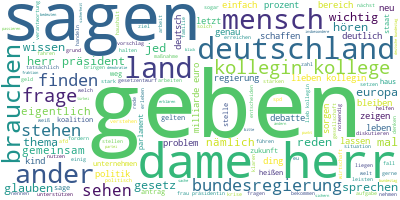

In [26]:
long_string_speeches = ','.join(speeches_subset["text_preprocessed_sentence"].tolist())
wordcloud_speeches = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud_speeches.generate(long_string_speeches)
wordcloud_speeches.to_image()

#### Tweets

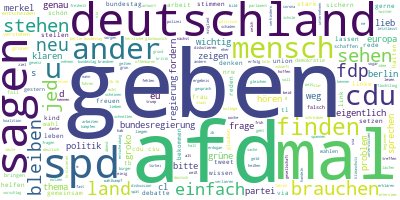

In [27]:
long_string_tweets = ','.join(tweets_raw["text_preprocessed_sentence"].tolist())
wordcloud_tweets = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud_tweets.generate(long_string_tweets)
wordcloud_tweets.to_image()

### Latent Dirichlet Allocation

In [28]:
import os
import pickle 
from pprint import pprint
from imp import reload
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models

#### Speeches

In [30]:
id2word_speeches = corpora.Dictionary(speeches_subset.text_preprocessed.to_list())
id2word_speeches.filter_extremes(no_below=8, no_above=0.1)
texts_speeches = speeches_subset.text_preprocessed.to_list()
corpus_speeches = [id2word_speeches.doc2bow(text) for text in texts_speeches]

In [31]:
# number of topics
num_topics_speeches = 40
# Build LDA model
lda_model_speeches = gensim.models.LdaMulticore(corpus=corpus_speeches,
                                       id2word=id2word_speeches,
                                       num_topics=num_topics_speeches)
# Print the Keyword in the 40 topics
pprint(lda_model_speeches.print_topics())
doc_lda_speeches = lda_model_speeches[corpus_speeches]

[(6,
  '0.008*"familie" + 0.003*"stärken" + 0.003*"usa" + 0.002*"diskussion" + '
  '0.002*"haushalt" + 0.002*"eltern" + 0.002*"erklären" + 0.002*"krieg" + '
  '0.002*"kommune" + 0.002*"bildung"'),
 (1,
  '0.004*"lage" + 0.003*"instrument" + 0.002*"vertrauen" + 0.002*"usa" + '
  '0.002*"ansprechen" + 0.002*"beschließen" + 0.002*"schnellen" + '
  '0.002*"international" + 0.002*"china" + 0.002*"unterstützung"'),
 (20,
  '0.008*"kommune" + 0.004*"bund" + 0.003*"familie" + 0.002*"pandemie" + '
  '0.002*"stärken" + 0.002*"ministerin" + 0.002*"sozial" + 0.002*"demokratie" '
  '+ 0.002*"beschließen" + 0.002*"sache"'),
 (23,
  '0.004*"krise" + 0.003*"familie" + 0.003*"chance" + 0.003*"haushalt" + '
  '0.002*"konkret" + 0.002*"sozial" + 0.002*"stärken" + 0.002*"sitzen" + '
  '0.002*"bundeswehr" + 0.002*"falsch"'),
 (30,
  '0.003*"konkret" + 0.003*"auffassung" + 0.002*"sache" + 0.002*"geschichte" + '
  '0.002*"bund" + 0.002*"bericht" + 0.002*"kosten" + 0.002*"beitrag" + '
  '0.002*"gespräch" + 0.

In [32]:
pyLDAvis.enable_notebook()
LDAvis_prepared_speeches = pyLDAvis.gensim_models.prepare(lda_model_speeches, corpus_speeches, id2word_speeches)
LDAvis_prepared_speeches

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2     -0.013393  0.004208       1        1  7.373896
17    -0.009866 -0.008179       2        1  6.137451
36     0.005882 -0.000899       3        1  5.213400
16    -0.009686 -0.016235       4        1  4.951738
38     0.015474  0.005140       5        1  4.381813
29     0.003377 -0.003404       6        1  4.317859
24     0.007291  0.000331       7        1  4.091712
28    -0.002643  0.013589       8        1  4.074321
19     0.005539 -0.001635       9        1  3.801272
32     0.002460 -0.001253      10        1  3.653270
33     0.011968  0.011387      11        1  2.809974
10    -0.018568 -0.009645      12        1  2.808271
25     0.002182 -0.007024      13        1  2.438818
37     0.014881 -0.019996      14        1  2.312330
5     -0.011669  0.007395      15        1  2.310618
35     0.009667  0.005259      16        1  2.145805
3     -0.004493  0.005181      17        1  2.113978
6      0.001584  0.013237      18        1  2.102773
7      0.005074  0.003497      19        1  2.083382
12     0.000089 -0.005328      20        1  2.069702
8     -0.007977  0.015409      21        1  2.046660
0      0.011029  0.018552      22        1  1.990456
34    -0.000629  0.006454      23        1  1.940577
23     0.009288 -0.000020      24        1  1.775998
39    -0.012231  0.020720      25        1  1.766731
21    -0.010516 -0.003783      26        1  1.752445
18     0.008942  0.023590      27        1  1.684619
22    -0.021811 -0.000065      28        1  1.595568
30     0.018700 -0.016207      29        1  1.488644
13     0.004630 -0.011019      30        1  1.481430
1     -0.008720 -0.012512      31        1  1.348799
15     0.000321  0.013884      32        1  1.345883
26    -0.054450 -0.015841      33        1  1.295053
9      0.008743 -0.019611      34        1  1.226030
4      0.000512 -0.011426      35        1  1.207750
31     0.012425  0.021627      36        1  1.164773
20     0.029890 -0.009230      37        1  1.066254
11     0.012575 -0.039347      38        1  1.026160
27    -0.022474  0.012133      39        1  0.938860
14     0.006604  0.011066      40        1  0.664927, topic_info=          Term        Freq       Total Category  logprob  loglift
1677   kommune  576.000000  576.000000  Default  30.0000  30.0000
1751   familie  715.000000  715.000000  Default  29.0000  29.0000
2210  haushalt  619.000000  619.000000  Default  28.0000  28.0000
171      krise  640.000000  640.000000  Default  27.0000  27.0000
4969    israel  215.000000  215.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
1751   familie    4.592206  715.880331  Topic40  -6.3643  -0.0359
1677   kommune    4.357198  576.972088  Topic40  -6.4168   0.1273
1632   bildung    4.320863  591.653047  Topic40  -6.4252   0.0938
613     lösung    4.043673  533.594712  Topic40  -6.4915   0.1308
1220    partei    3.774523  601.197112  Topic40  -6.5604  -0.0574

[3104 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
6702      1  0.050666  \n   
6702      2  0.101333  \n   
6702      3  0.050666  \n   
6702      4  0.050666  \n   
6702      5  0.101333  \n   
...     ...       ...    ...
7593     36  0.010747       
7593     37  0.021495       
7593     38  0.007165       
7593     39  0.010747       
7593     40  0.010747       

[33496 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 18, 37, 17, 39, 30, 25, 29, 20, 33, 34, 11, 26, 38, 6, 36, 4, 7, 8, 13, 9, 1, 35, 24, 40, 22, 19, 23, 31, 14, 2, 16, 27, 10, 5, 32, 21, 12, 28, 15])

In [35]:
lda_model_speeches.save("../models/lda_speeches")

#### Twitter

In [37]:
id2word_twitter = corpora.Dictionary(tweets_raw.text_preprocessed.to_list())
id2word_twitter.filter_extremes(no_below=10, no_above=0.1)
texts_twitter = tweets_raw.text_preprocessed.to_list()
corpus_twitter = [id2word_twitter.doc2bow(text) for text in texts_twitter]

In [38]:
# number of topics
num_topics = 40
# Build LDA model
lda_model_twitter = gensim.models.LdaMulticore(corpus=corpus_twitter,
                                               id2word=id2word_twitter,
                                               num_topics=num_topics)
# Print the Keyword in the 100 topics
pprint(lda_model_twitter.print_topics())
doc_lda_twitter = lda_model_twitter[corpus_twitter]

[(21,
  '0.012*"griechenland" + 0.009*"all" + 0.008*"konkret" + 0.008*"cdu" + '
  '0.007*"      " + 0.007*"bundestag" + 0.006*"jed" + 0.006*"\n'
  '     " + 0.006*"wagenknecht" + 0.006*"zeitung"'),
 (17,
  '0.012*"einfach" + 0.011*"mal" + 0.010*"schaden" + 0.009*"bekommen" + '
  '0.009*"politisch" + 0.008*"alternative" + 0.008*"geben" + 0.008*"söder" + '
  '0.007*"all" + 0.007*"ander"'),
 (26,
  '0.015*"verstehen" + 0.011*"meinungsfreiheit" + 0.010*"spielen" + 0.009*"ok" '
  '+ 0.008*"rolle" + 0.008*"deutschland" + 0.006*"seehofer" + 0.006*"stadt" + '
  '0.006*"bundesverfassungsgericht" + 0.006*"sorgen"'),
 (33,
  '0.283*"\n'
  '     " + 0.049*"\n'
  '\n'
  '     " + 0.021*"glückwunsch" + 0.016*"herzliche" + 0.008*"schule" + '
  '0.008*"bundestag" + 0.006*"grundgesetz" + 0.006*"+" + 0.006*"lieb" + '
  '0.006*"deutsch"'),
 (14,
  '0.015*"mensch" + 0.014*"brauchen" + 0.009*"folgen" + 0.009*"\n'
  '   " + 0.009*"schritt" + 0.008*"all" + 0.008*"geben" + 0.008*"deutschland" '
  '+ 0.007*"zu

In [39]:
pyLDAvis.enable_notebook()
LDAvis_prepared_twitter = pyLDAvis.gensim_models.prepare(lda_model_twitter, corpus_twitter, id2word_twitter)
LDAvis_prepared_twitter

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
33    -0.015721 -0.113947       1        1  3.805239
30     0.065121  0.055036       2        1  3.771916
38    -0.394256  0.037281       3        1  3.356348
22     0.021081 -0.110158       4        1  3.312140
12     0.036206  0.085225       5        1  3.071821
11     0.068725  0.018605       6        1  2.938892
32     0.062612  0.009419       7        1  2.880565
39     0.058340  0.080099       8        1  2.875997
1      0.052152  0.059132       9        1  2.858118
8     -0.008219  0.125502      10        1  2.851305
2      0.051590  0.041745      11        1  2.823572
14     0.045570  0.079995      12        1  2.788141
19     0.050904 -0.048693      13        1  2.634367
26     0.039457  0.073664      14        1  2.630879
16    -0.008598 -0.057932      15        1  2.609814
17     0.041265 -0.023297      16        1  2.581561
4      0.039596 -0.010286      17        1  2.576684
15     0.050032  0.032081      18        1  2.541707
3      0.017780  0.039805      19        1  2.491120
35     0.021701 -0.017727      20        1  2.445179
21     0.040835  0.064992      21        1  2.438823
6      0.025039 -0.105062      22        1  2.438465
10     0.039877 -0.017679      23        1  2.420938
25     0.036515 -0.018311      24        1  2.375445
5      0.007391 -0.016412      25        1  2.342763
29     0.037794 -0.038164      26        1  2.335343
0      0.015444 -0.063780      27        1  2.299752
36     0.051320  0.018947      28        1  2.266404
27    -0.005707 -0.072161      29        1  2.247091
7     -0.008298  0.040043      30        1  2.218997
18     0.014811 -0.039265      31        1  2.213196
23     0.016276  0.023014      32        1  2.201080
13    -0.015039 -0.067087      33        1  2.182344
20     0.018181 -0.014414      34        1  2.142537
31     0.010227  0.003503      35        1  2.046015
34    -0.130146  0.072982      36        1  1.767261
28    -0.062431 -0.091866      37        1  1.681873
9     -0.040826 -0.009564      38        1  1.680497
24    -0.128956 -0.080885      39        1  1.505098
37    -0.217644  0.055620      40        1  1.350708, topic_info=         Term          Freq         Total Category  logprob  loglift
126   \n       32021.000000  32021.000000  Default  30.0000  30.0000
1083       tb  11805.000000  11805.000000  Default  29.0000  29.0000
1446        +  10162.000000  10162.000000  Default  28.0000  28.0000
7480       cl   4648.000000   4648.000000  Default  27.0000  27.0000
1626      afd  18019.000000  18019.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1728       of    169.603928   3062.109878  Topic40  -5.3022   1.4111
1734       to    159.515897   3780.254735  Topic40  -5.3635   1.1391
1225             133.830774   7035.457150  Topic40  -5.5391   0.3424
54        mal    132.163233  12975.102303  Topic40  -5.5516  -0.2822
450   einfach    129.106796   5238.049426  Topic40  -5.5750   0.6015

[3173 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
14646     33  0.988704   \n\n    
580        1  0.395264  \n\n     
580        2  0.028973  \n\n     
580        3  0.014318  \n\n     
580        4  0.039922  \n\n     
...      ...       ...        ...
1395      33  0.000770          €
1395      36  0.023114          €
1395      38  0.003082          €
1395      39  0.000770          €
1395      40  0.003082          €

[24810 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[34, 31, 39, 23, 13, 12, 33, 40, 2, 9, 3, 15, 20, 27, 17, 18, 5, 16, 4, 36, 22, 7, 11, 26, 6, 30, 1, 37, 28, 8, 19, 24, 14, 21, 32, 35, 29, 10, 25, 38])

In [40]:
lda_model_twitter.save("../models/lda_twitter")

### Non Negative Matrix Factorization

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text

In [42]:
def display_topics(model, feature_names, num_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i] \
             for i in topic.argsort()[:-num_top_words - 1:-1]]))

#### Speeches

In [43]:
tfidf_vectorizer_speeches = TfidfVectorizer(max_df = .2, min_df = .01)
speeches_tfidf = tfidf_vectorizer_speeches.fit_transform(speeches_subset.text_preprocessed_sentence.tolist())

# Create an NMF instance: model
model_speeches = NMF(n_components=40)

# Fit the model to articles
model_speeches.fit(speeches_tfidf)

# Transform the articles: nmf_features
nmf_features_speeches = model_speeches.transform(speeches_tfidf)

# Create data-frame of Doc-Term Matrix with nouns as column names
components_df_speeches = pd.DataFrame(model_speeches.components_, columns=tfidf_vectorizer_speeches.get_feature_names_out())

# Display topics
display_topics(model_speeches, tfidf_vectorizer_speeches.get_feature_names_out(), 5)

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(



Topic  0
arbeit, arbeitsmarkt, sorgen, chance, wandel

Topic  1
gerne, zwischenfrage, zusammenhang, redezeit, hinweis

Topic  2
europa, europäische, europäisch, union, großbritannien

Topic  3
antrag, grüne, fdp, linke, fordern

Topic  4
bitte, solange, dr, verständnis, bringen

Topic  5
demokratie, freiheit, leben, grundgesetz, ddr

Topic  6
soldat, bundeswehr, soldatinnen, einsatz, mandat

Topic  7
kind, familie, eltern, mutter, kita

Topic  8
euro, milliarde, million, haushalt, geld

Topic  9
parlament, bundestag, abgeordnete, deutsche, fraktion

Topic  10
pandemie, krise, virus, impfen, maßnahme

Topic  11
bildung, schule, beruflich, bafög, bund

Topic  12
türkei, türkisch, erdogan, syrien, nato

Topic  13
pflege, versorgung, patient, arzt, schritt

Topic  14
reden, debatte, fragen, fahren, rede

Topic  15
datum, it, digital, sicherheit, bürger

Topic  16
geehrt, ministerin, bericht, fraktion, haus

Topic  17
schön, genauso, ansprechen, geist, thüringen

Topic  18
lieb, rente, gru

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


#### Twitter

In [44]:
tfidf_vectorizer_tweets = TfidfVectorizer(max_df = .2, min_df = .01)
tweets_tfidf = tfidf_vectorizer_tweets.fit_transform(tweets_raw.text_preprocessed_sentence.tolist())

# Create an NMF instance: model
model_tweets = NMF(n_components=40)

# Fit the model to articles
model_tweets.fit(tweets_tfidf)

# Transform the articles: nmf_features
nmf_features_tweets = model_tweets.transform(tweets_tfidf)

# Create data-frame of Doc-Term Matrix with nouns as column names
components_df_tweets = pd.DataFrame(model_tweets.components_, columns=tfidf_vectorizer_tweets.get_feature_names_out())

# Display topics
display_topics(model_tweets, tfidf_vectorizer_tweets.get_feature_names_out(), 5)

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(



Topic  0
afd, partei, demokratie, lassen, linke

Topic  1
tb, problem, groko, eigentlich, freuen

Topic  2
mal, lassen, sprechen, eigentlich, partei

Topic  3
geben, problem, corona, partei, leben

Topic  4
all, partei, demokratie, leben, corona

Topic  5
spd, groko, linke, csu, partei

Topic  6
bundestag, rede, linke, groko, demokratie

Topic  7
mensch, leben, lassen, corona, sprechen

Topic  8
sagen, eigentlich, partei, problem, linke

Topic  9
cdu, csu, partei, linke, freuen

Topic  10
deutschland, europa, leben, problem, corona

Topic  11
ander, partei, lassen, problem, corona

Topic  12
fdp, partei, linke, sprechen, rede

Topic  13
brauchen, europa, demokratie, corona, groko

Topic  14
jed, leben, demokratie, partei, kind

Topic  15
berlin, freuen, leben, europa, eigentlich

Topic  16
neu, linke, freuen, sprechen, corona

Topic  17
stehen, demokratie, partei, lassen, europa

Topic  18
sehen, problem, lassen, freuen, corona

Topic  19
finden, partei, rede, linke, problem

Topic  2

### Bertopic

In [45]:
from bertopic import BERTopic

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/graph_objs/__init__.py:287: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/graph_objs/__init__.py:287: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/graph_objs/__init__.py:287: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/graph_objs/__init__.py:287: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ip

#### Speeches

In [46]:
topic_model_speeches = BERTopic(language = "German")
docs_speeches = speeches_subset.text_preprocessed_sentence.tolist()
topics_speeches, probs_speeches = topic_model_speeches.fit_transform(docs_speeches)

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/hdbscan/hdbscan_.py:275: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  alg = KDTreeBoruvkaAlgorithm(tree, min_samples, metric=metric,
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/hdbscan/hdbscan_.py:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in N

In [47]:
topic_model_speeches.get_topic_info()

Topic  Count                                               Name
0      -1   1578                           -1_herr_sagen_geben_land
1       0    219    0_klimaschutz_energiewende_energie_erneuerbaren
2       1    145                 1_digital_datum_it_digitalisierung
3       2    139                  2_deutsch_herr_deutschland_mensch
4       3    134                         3_rente_kollege_lieb_sagen
5       4    126                        4_pandemie_virus_impfen_all
6       5    106                        5_herr_dame_bundestag_sagen
7       6    102                6_patient_ärztlich_frage_ausbildung
8       7     86                         7_russland_iran_europa_usa
9       8     85              8_europa_europäische_europäisch_union
10      9     73               9_türkei_türkisch_erdogan_völkermord
11     10     72                     10_herr_dame_partei_demokratie
13     11     65                  11_versorgung_patient_arzt_pflege
12     12     65             12_präsident_herr_präsidentin_schwören
14     13     63              13_israel_hisbollah_opfer_deutschland
15     14     62                               14_überrascht_okay__
16     15     60              15_migration_flüchtling_pakt_brauchen
17     16     59            16_arbeit_deutschland_arbeitsmarkt_herr
18     17     57               17_pflege_wichtig_versorgung_patient
19     18     56                     18_gerne_schön_heiß_jedenfalls
20     19     55                          19_is_saudi_jemen_arabien
21     20     47           20_gesetz_grundrechte_herr_gesetzentwurf
22     21     46                        21_kind_bafög_schule_eltern
23     22     45                  22_fertigen_gerne_redezeit_minute
24     23     43                         23_herr_deutsch_sagen_dame
25     24     36                          24_afrika_deg_unmiss_land
26     25     34                      25_euro_banken_milliarde_geld
27     26     34             26_herr_hinterwäldler_wortmeldung_frau
28     27     32                          27_frau_sagen_herr_mensch
29     28     29                 28_geben_homeoffice_branche_arbeit
30     29     28                     29_haushalt_schulde_sagen_land
31     30     27              30_brexit_großbritannien_union_europa
32     31     27        31_vermittlungsausschuss_fraktion_herr_dame
33     32     24                        32_soldat_mali_einsatz_nato
34     33     23        33_frage_beantworten_zwischenfrage_klatscht
35     34     21         34_frage_kabinett_minister_bundesregierung
36     35     20                            35_bitte_schön_gerne_dr
37     36     19    36_staatssekretär_frage_beantworten_schriftlich
38     37     19        37_bundeswehr_soldat_soldatinnen_ministerin
39     38     19                     38_geschlecht_divers_mann_frau
40     39     18  39_opfer_menschenhandels_strafgesetzbuch_richt...
41     40     18                40_bitte_jederzeit_danke_verzeihung
42     41     17  41_verlag_autor_rückrufsrecht_zweitverwertungs...
43     42     15      42_china_hongkong_chinesisch_meinungsfreiheit
44     43     14     43_cannabis_rauchen_tabakindustrie_werbeverbot
45     44     14       44_afghanistan_afghanisch_taliban_engagement
46     45     12          45_europa_deutschland_national_minderheit
47     46     11                           46_eeg_grüne_grün_antrag

In [48]:
topic_model_speeches.visualize_topics()

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [49]:
topic_model_speeches.save("../models/bertopic_speeches")

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



#### Twitter

In [50]:
topic_model_tweets = BERTopic(language = "German")
docs_tweets = tweets_raw.text_preprocessed_sentence.tolist()
topics_tweets, probs_tweets = topic_model_tweets.fit_transform(docs_tweets)


KeyboardInterrupt



In [ ]:
topic_model_tweets.get_topic_info()

In [ ]:
topic_model_tweets.visualize_topics()

In [ ]:
topic_model_tweets.save("../models/bertopic_speeches")

No perplexity as not so good( Wallach et al. (ICML 2009))

We will use coherence as automatic measure. (Maybe tf-idf coherence)